## Recommender Systems repair assignment

Thom Eijck - i6256023

In [35]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score
import seaborn as sns

path_data = "./preprocessed_dataset"

ratings_df = pd.read_csv(path_data+"/ratings.csv")
movies_df = pd.read_csv(path_data+"/movies.csv")

ratings_df = ratings_df.drop(columns=['timestamp'])
print(ratings_df)

       user    item  rating
0         1       1     4.0
1         1       3     4.0
2         1       6     4.0
3         1      70     3.0
4         1     101     5.0
...     ...     ...     ...
64433   610  163937     3.5
64434   610  166534     4.0
64435   610  168250     5.0
64436   610  168252     5.0
64437   610  170875     3.0

[64438 rows x 3 columns]


In [2]:
user_matrix = ratings_df.pivot_table(columns='item', index='user', values='rating')
user_id_set = set(ratings_df['user'])
user_id_indexes = ratings_df['user'].unique()
user_matrix = user_matrix.fillna(0)
numpy_array = user_matrix.to_numpy()
sim_matrix = np.corrcoef(numpy_array)
arr = [0.8, 0.2, 0.5]

# Random Groups
GROUP_SIZE = 4
def loc(group,x):
    return random.random()*arr[x]
num_users = ratings_df['user'].max()
user_ids = list(range(1, num_users + 1))
random.shuffle(user_ids)
num_groups = num_users // GROUP_SIZE

rand_groups = []

for i in range(num_groups):
    group = random.sample(user_ids, GROUP_SIZE)
    rand_groups.append(group)
    user_ids = [user_id for user_id in user_ids if user_id not in group]

rand_groups

[[564, 588, 253, 51],
 [354, 76, 246, 219],
 [270, 156, 411, 212],
 [154, 390, 127, 508],
 [478, 20, 54, 92],
 [168, 282, 32, 284],
 [285, 410, 53, 131],
 [315, 104, 420, 532],
 [578, 227, 597, 445],
 [224, 389, 569, 150],
 [446, 433, 35, 78],
 [530, 281, 102, 365],
 [373, 162, 317, 511],
 [65, 82, 138, 521],
 [415, 519, 375, 346],
 [438, 43, 291, 6],
 [305, 80, 194, 259],
 [385, 324, 366, 72],
 [576, 250, 327, 5],
 [60, 492, 160, 136],
 [342, 528, 18, 120],
 [347, 217, 273, 404],
 [545, 575, 334, 540],
 [223, 235, 124, 501],
 [448, 3, 145, 505],
 [605, 57, 372, 465],
 [277, 406, 362, 188],
 [479, 77, 30, 343],
 [436, 242, 15, 590],
 [397, 199, 491, 176],
 [412, 206, 229, 233],
 [481, 458, 349, 440],
 [513, 153, 265, 570],
 [128, 368, 198, 287],
 [91, 344, 83, 52],
 [201, 63, 476, 262],
 [561, 68, 192, 45],
 [96, 14, 557, 392],
 [320, 303, 10, 44],
 [245, 261, 295, 191],
 [526, 422, 583, 164],
 [416, 463, 399, 137],
 [429, 110, 292, 307],
 [510, 408, 132, 456],
 [308, 297, 543, 182],
 

In [3]:
# Similar groups

similarity_threshold = 0.4
user_id_indexes = np.arange(610)
assigned_users = set()

similar_groups = []
# Function to find similar users for a given user
def find_similar_users(user_idx):
    return [idx for idx, sim in enumerate(sim_matrix[user_idx]) if sim > similarity_threshold and idx not in assigned_users]

for user_idx in user_id_indexes:
    if user_idx not in assigned_users:
        similar_users = find_similar_users(user_idx)
        if len(similar_users) == 3:
            group = [user_idx] + random.sample(similar_users, 3)
            similar_groups.append(group)
            assigned_users.update(group)
            
similar_groups

[[20, 20, 533, 291],
 [29, 549, 365, 29],
 [31, 149, 31, 269],
 [43, 349, 491, 43],
 [61, 17, 61, 248],
 [83, 436, 371, 83],
 [90, 329, 90, 569],
 [113, 290, 147, 113],
 [130, 15, 109, 130],
 [131, 199, 131, 488],
 [151, 347, 496, 151],
 [155, 390, 155, 274],
 [161, 116, 57, 161],
 [162, 480, 162, 359],
 [163, 493, 492, 163],
 [176, 67, 176, 524],
 [190, 190, 39, 601],
 [201, 201, 596, 468],
 [208, 208, 66, 24],
 [219, 219, 433, 238],
 [285, 285, 424, 300],
 [303, 523, 303, 313],
 [338, 304, 104, 338],
 [413, 598, 479, 413],
 [437, 437, 607, 218],
 [470, 398, 580, 470],
 [500, 520, 336, 500],
 [514, 188, 295, 514],
 [572, 572, 560, 62],
 [581, 246, 581, 204],
 [589, 287, 327, 589]]

In [4]:
# Dissimilar groups

dissimilarity_threshold = 0.2
user_indexes = np.arange(num_users)
dissimilar_groups = []
assigned_users = set()

# Function to find dissimilar users for a given user
def find_dissimilar_users(user_idx):
    return [idx+1 for idx, sim in enumerate(sim_matrix[user_idx]) if sim < dissimilarity_threshold and idx not in assigned_users]

for user_idx in user_indexes:
    if user_idx not in assigned_users:
        dissimilar_users = find_dissimilar_users(user_idx)
        
        if len(dissimilar_users) >= 3:
            dissimilar_group = [user_idx+1] + random.sample(dissimilar_users, 3)
            dissimilar_groups.append(dissimilar_group)
            assigned_users.update(dissimilar_group)

dissimilar_groups

[[1, 429, 254, 11],
 [3, 191, 461, 168],
 [5, 283, 258, 112],
 [7, 205, 427, 578],
 [9, 26, 588, 167],
 [11, 551, 563, 582],
 [13, 174, 298, 456],
 [15, 505, 106, 222],
 [17, 448, 208, 77],
 [19, 494, 58, 179],
 [21, 116, 128, 557],
 [23, 605, 546, 226],
 [25, 323, 370, 43],
 [28, 70, 493, 535],
 [30, 221, 417, 367],
 [32, 576, 108, 279],
 [34, 213, 13, 461],
 [36, 448, 406, 120],
 [38, 87, 246, 151],
 [40, 466, 256, 545],
 [42, 610, 470, 487],
 [45, 321, 151, 413],
 [47, 421, 367, 226],
 [49, 423, 314, 537],
 [51, 484, 291, 389],
 [53, 532, 264, 575],
 [55, 545, 318, 588],
 [57, 142, 429, 369],
 [60, 356, 268, 196],
 [62, 202, 517, 165],
 [64, 516, 69, 539],
 [66, 581, 291, 165],
 [68, 408, 598, 406],
 [72, 482, 115, 501],
 [74, 146, 588, 242],
 [76, 505, 238, 320],
 [79, 426, 19, 3],
 [81, 127, 123, 339],
 [83, 36, 363, 201],
 [85, 328, 199, 445],
 [87, 395, 492, 354],
 [89, 484, 520, 362],
 [91, 508, 130, 173],
 [93, 561, 100, 338],
 [95, 341, 218, 298],
 [97, 444, 276, 246],
 [99, 

In [5]:
# Split data using 80/20 hold-out validation

random_seed = 22
TEST_SIZE = 0.2

train_data, test_data = train_test_split(ratings_df, test_size=TEST_SIZE, random_state=random_seed)

print(train_data.head(), "\n")
print(test_data.head())

       user    item  rating
1273     18    4007     4.0
17988   195     296     5.0
26523   279  122920     3.0
22277   232   57526     3.0
61598   602     440     4.0 

       user   item  rating
26265   275   3260     5.0
51882   510   3081     1.5
29068   298   8531     2.5
31976   318  56775     3.0
9185     91   1967     4.0


In [6]:
# Collaborative filtering RS

from lenskit.algorithms import Recommender
from lenskit.algorithms.user_knn import UserUser

In [7]:
NUM_RECS = 10

user_user = UserUser(15, min_nbrs=3)
recsys = Recommender.adapt(user_user)
recsys.fit(ratings_df)

random_groups_recommendations = []
# Now we can give individual recommendations for every user in a group
random_group = random.choice(rand_groups)
for user in random_group:
    recommendations = recsys.recommend(user, NUM_RECS)
    random_groups_recommendations.append(recommendations)
    average_rating = recommendations['score'].mean()
    display(recommendations)

Numba is using threading layer omp - consider TBB
found 1 potential runtime problems - see https://boi.st/lkpy-perf


,item,score
0,26810,5.724972
1,4117,5.658651
2,7121,5.486568
3,87234,5.475286
4,112421,5.440731
5,168492,5.333982
6,3030,5.262825
7,5833,5.246730
8,7706,5.233569
9,51931,5.224105


,item,score
0,177593,5.919885
1,53129,5.812276
2,51931,5.734163
3,168492,5.691769
4,87234,5.607663
5,1733,5.511750
6,5500,5.510360
7,1964,5.498063
8,1204,5.435627
9,1238,5.434358


,item,score
0,2936,5.067766
1,53123,5.045964
2,4033,4.971901
3,1236,4.899920
4,1411,4.867310
5,3771,4.817134
6,5833,4.808140
7,1178,4.775627
8,1755,4.774150
9,177593,4.755248


,item,score
0,947,5.691395
1,1236,5.625171
2,4432,5.580969
3,2491,5.561347
4,26810,5.514397
5,4419,5.509857
6,1411,5.434419
7,177593,5.426486
8,31116,5.395744
9,28,5.375542


In [8]:
# Group aggregation using "least misery"

most_miserable_random_user = []
for group in rand_groups:
    average_ratings = []
    lowest_avg = 0
    for user in group:
        recommendations = recsys.recommend(user, NUM_RECS)

        average_rating = recommendations['score'].mean()
        average_ratings.append(average_rating)

        i = average_ratings.index(min(average_ratings))
        if average_rating < lowest_avg:
            lowest_avg = average_rating

    most_miserable_random_user.append(i)

In [9]:
# Get recommendations of the group

recommendations_random_group = []
for i, group in enumerate(rand_groups):
    user_id = group[most_miserable_random_user[i]]
    recommendation = recsys.recommend(user_id, NUM_RECS)
    recommendations_random_group.append(recommendation)


# Best 10 recommendations for every group using least misery
display(recommendations_random_group)

[     item     score
 0   26810  4.617071
 1    3494  4.571122
 2    7706  4.499979
 3  177593  4.474635
 4    1046  4.458783
 5    1411  4.427267
 6    1178  4.426468
 7   73023  4.420896
 8    3871  4.414332
 9    5833  4.403637,
      item     score
 0    4117  4.453837
 1    3494  4.447294
 2    5747  4.386925
 3    3606  4.352571
 4  105197  4.273589
 5    7706  4.228209
 6    7121  4.226050
 7    2936  4.221887
 8     750  4.218421
 9    5833  4.213574,
      item     score
 0    4021  4.616109
 1    5833  4.594411
 2  105197  4.579213
 3    2303  4.543586
 4     175  4.538431
 5    1411  4.526042
 6  127108  4.518957
 7    2202  4.498232
 8     299  4.466958
 9    7706  4.460103,
     item     score
 0   3061  4.770375
 1   3814  4.345045
 2   3675  3.907108
 3    918  3.887959
 4     85  3.854661
 5    971  3.851138
 6   3494  3.820978
 7  51931  3.776310
 8   5747  3.758453
 9   5833  3.745872,
      item     score
 0    7121  4.398030
 1    4021  4.304945
 2    3727  4.220328

In [10]:
# Similar groups

most_miserable_similar_user = []
for group in similar_groups:
    average_ratings = []
    lowest_avg = 0
    for user in group:
        recommendations = recsys.recommend(user, NUM_RECS)

        average_rating = recommendations['score'].mean()
        average_ratings.append(average_rating)

        i = average_ratings.index(min(average_ratings))
        if average_rating < lowest_avg:
            lowest_avg = average_rating

    most_miserable_similar_user.append(i)

recommendations_similar_group = []
for i, group in enumerate(similar_groups):
    user_id = group[most_miserable_similar_user[i]]
    recommendation = recsys.recommend(user_id, NUM_RECS)
    recommendations_similar_group.append(recommendation)

In [11]:
# Dissimilar groups

most_miserable_dissimilar_user = []
for group in dissimilar_groups:
    average_ratings = []
    lowest_avg = 0
    for user in group:
        recommendations = recsys.recommend(user, NUM_RECS)

        average_rating = recommendations['score'].mean()
        average_ratings.append(average_rating)

        i = average_ratings.index(min(average_ratings))
        if average_rating < lowest_avg:
            lowest_avg = average_rating

    most_miserable_dissimilar_user.append(i)

recommendations_dissimilar_group = []
for i, group in enumerate(dissimilar_groups):
    user_id = group[most_miserable_dissimilar_user[i]]
    recommendation = recsys.recommend(user_id, NUM_RECS)
    recommendations_dissimilar_group.append(recommendation)

In [12]:
# nDCG random group
avg_user_ratings = ratings_df.groupby('user')['rating'].mean()
random_ndcg = []
for i, group in enumerate(rand_groups):
    ground_truth = []
    for user in group:
        ground_truth.append(avg_user_ratings[user])
    
    group_scores = recommendations_random_group[i][:4]['score']
    ndcg = ndcg_score([ground_truth], [group_scores]) - loc(group,0)
    random_ndcg.append(ndcg)

In [13]:
# nDCG similar group
similar_ndcg = []
for i, group in enumerate(similar_groups):
    ground_truth = []
    for user in group:
        ground_truth.append(avg_user_ratings[user])
    
    group_scores = recommendations_similar_group[i][:4]['score']
    ndcg = ndcg_score([ground_truth], [group_scores]) - loc(group,1)
    similar_ndcg.append(ndcg)

In [27]:
# nDCG dissimilar group
dissimilar_ndcg = []
for i, group in enumerate(dissimilar_groups):
    if i == 25:
        break
    ground_truth = []
    for user in group:
        ground_truth.append(avg_user_ratings[user])
        
    group_scores = recommendations_dissimilar_group[i][:4]['score']
    ndcg = ndcg_score([ground_truth], [group_scores]) - loc(group,2)
    dissimilar_ndcg.append(ndcg)

<ipython-input-61-d717f45b90a0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
<ipython-input-61-d717f45b90a0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
<ipython-input-61-d717f45b90a0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
<ipython-input-61-d717f45b90a0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
<ipython-input-61-d717f45b90a0>:7: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-61-d717f45b90a0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
<ipython-input-61-d717f45b90a0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
<ipython-input-61-d717f45b90a0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
<ipython-input-61-d717f45b90a0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
<ipython-input-61-d717f45b90a0>:7: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-61-d717f45b90a0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
<ipython-input-61-d717f45b90a0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
<ipython-input-61-d717f45b90a0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(new_row, ignore_index=True)
No handles with labels found to put in legend.


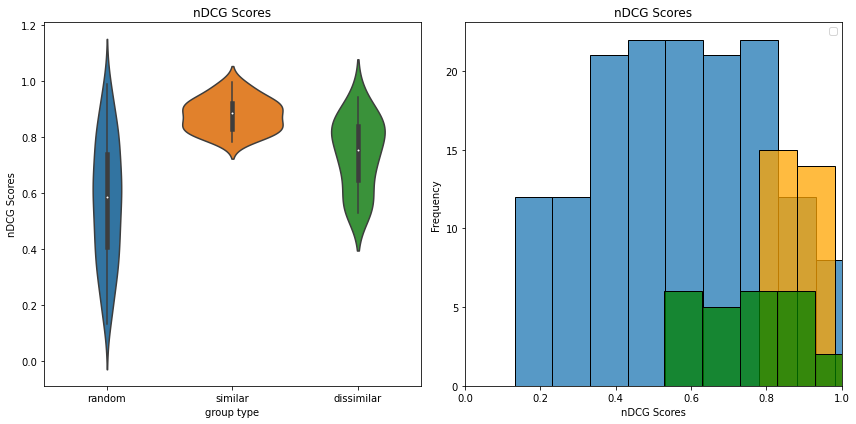

In [61]:
# Visualization - Boxplot and Histogram
plt.figure(figsize=(12, 6))
plot_df = pd.DataFrame()

for ndcg in random_ndcg:
    new_row = {'group type': 'random', 'score':ndcg}
    plot_df = plot_df.append(new_row, ignore_index=True)
    
for ndcg in similar_ndcg:
    new_row = {'group type': 'similar', 'score':ndcg}
    plot_df = plot_df.append(new_row, ignore_index=True)
    
for ndcg in dissimilar_ndcg:
    new_row = {'group type': 'dissimilar', 'score':ndcg}
    plot_df = plot_df.append(new_row, ignore_index=True)

# Violinplot for nDCG scores
plt.subplot(1, 2, 1)
sns.violinplot(data=plot_df, x='group type', y='score')
plt.title('nDCG Scores')
plt.ylabel('nDCG Scores')

# Histogram
plt.subplot(1, 2, 2)
#plt.hist(random_ndcg, alpha=0.5, label='random group')
#plt.hist(similar_ndcg, alpha=0.5, label='similar group')
#plt.hist(dissimilar_ndcg, alpha=0.5, label='dissimilar group')

sns.histplot(data=plot_df[plot_df['group type']=='random'], x='score', binwidth=0.1)
ax = sns.histplot(data=plot_df[plot_df['group type']=='similar'], x='score', binwidth=0.1, color='orange')
ax.set_xlim(0,1)
sns.histplot(data=plot_df[plot_df['group type']=='dissimilar'], x='score', binwidth=0.1, color='green')

plt.title('nDCG Scores')
plt.xlabel('nDCG Scores')
plt.ylabel('Frequency')
plt.legend()


# Display the plots
plt.tight_layout()
plt.show()

Now we answer the research question: Are there any differences in the performances of a group recommender using a least misery strategy related to the internal similarity of the group members' preferences?

We see in the histogram or violinplot that the similar groups performs best. This is probably because the similarity measure used to identify similar users (the Pearson correlation) is accurate and aligns well with users' actual preferences.
We also see that the variance for random users is quite high, because there is no underlying pattern among the users in a group. This means that there can be a group that is receives very good recommendations, but it is also possible that the group receives recommendations that do not allign with the users preferences. This can be seen in the histogram.

So in conclusion, there are differences if you group users with different similarities.